___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">DA & DVwPY</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Exploratory Data Analysis (EDA) Project</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">AutoScout Car Price Prediction EDA</p>



## Introduction
Welcome to "***AutoScout Exploratory Data Analysis (EDA) Project***". This is the project of completing ***Data Analysis & Data Visualization*** Courses and a successful hand-over is mandatory for getting certification for both courses. **Auto Scout** data used in this project scraped from the Website of an online car trading company in 2022, and contains many features of 13 different car makes including 594 models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using a variety of Python libraries, such as Numpy, Pandas, Matplotlib, Seaborn, Scipy, and then you will get a clean dataset for your analysis and pretictive modelling in Machine Learning Path. So you will have the chance to use all the skills you have already learned in the Data Analysis and Visualization courses.

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to ``'Data Cleaning'``. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to ``'Filling Data'``, in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation, Encoding, is done as well.
* **The third part** is related to ``'Handling Outliers of Data'`` via Visualization libraries. So, some insights will be extracted.

**``SPECIAL NOTE:``**  However, you are ``free to create your own style``. You do ``NOT`` have to stick to the steps above. Nevertheless, we, the DA & DV instructors, recommend you study each part separately to create a source notebook for your further studies. 

In order to build your Portfolio in terms of the GitHub account, you need to push your solution file up to your own repository.

Please after solving the task, commit your notebook to GitHub and submit its link to LMS page where the project is settled down.

**BE NOTED:** Please ``DO NOT FORGET`` to click the submit button.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)



# PART- 1 `( Data Cleaning )`

In [ ]:
#%pip install googletrans==4.0.0rc1

In [ ]:
#%pip install langdetect

In [ ]:
#%pip install textblob

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from langdetect import detect
import numpy as np
from textblob import TextBlob
from tqdm import tqdm
tqdm.pandas()
#from translate import Translator

In [3]:
def show_nulls(data):
    
    '''
    
    This function plots missing values for each column by observation in the dataset.
    
    ''' 
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

In [5]:
# df = pd.read_json('as24_cars.json')
# pd.options.mode.dtype_backend = 'pyarrow'
df = pd.read_csv('before_drop.csv')

/var/folders/1p/747b_4cn70v5h3223zdf0k180000gp/T/ipykernel_4551/2583148519.py:3: DtypeWarning: Columns (55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('before_drop.csv')


<Figure size 1000x500 with 0 Axes>

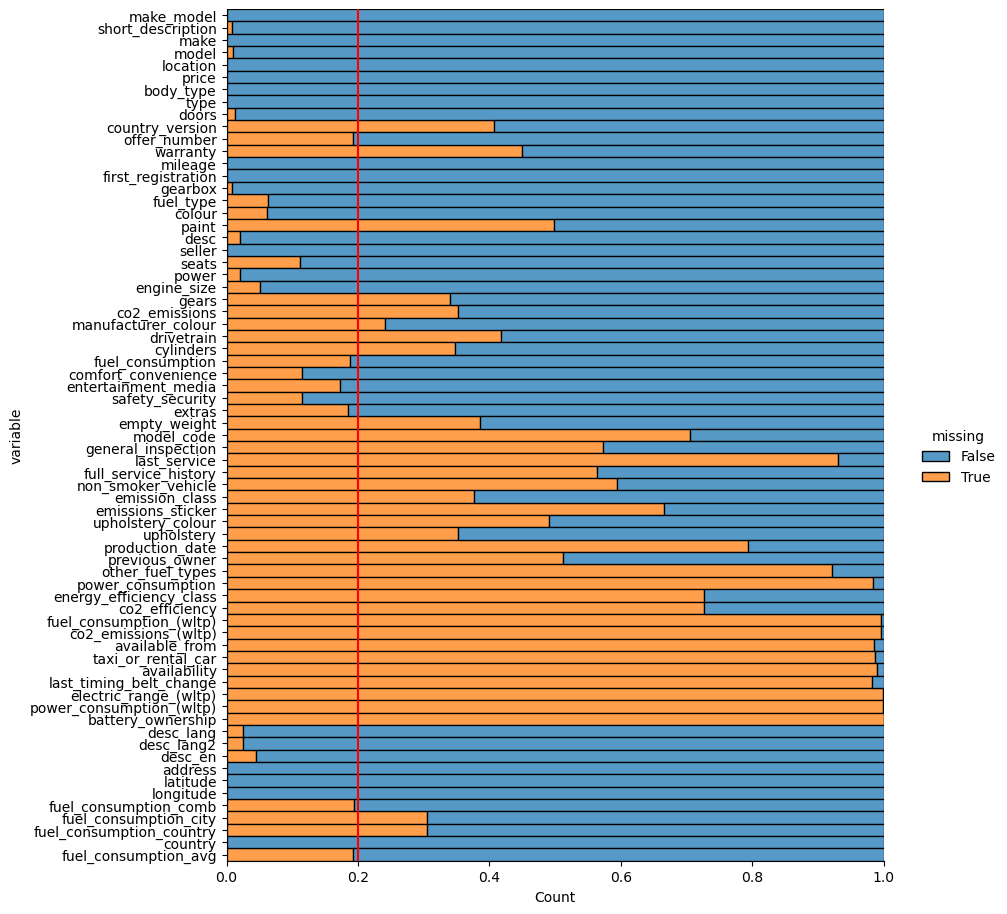

In [6]:
show_nulls(df)

In [7]:
pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100

In [10]:
df.sample(3)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_(wltp),co2_emissions_(wltp),available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_(wltp),power_consumption_(wltp),battery_ownership,desc_lang,desc_lang2,desc_en,address,latitude,longitude,fuel_consumption_comb,fuel_consumption_city,fuel_consumption_country,country
15882,Dacia Dokker,1.3 TCE GPF 130cv GPF SL Xplore,Dacia,Dokker,"CRTA NII KM 434, 22520 FRAGA, ES",14300,Station wagon,Used,5.0,Spain,7486335,NaN,77000.0,2019-06-01,Manual,Gasoline,White,NaN,"['Precio al contado: 15300 euros', 'Vehículo e...",Dealer,NaN,96 kW (131 hp),1333.0,NaN,NaN,Blanco,NaN,NaN,"[['6.2 l/100 km (comb.)'], ['7.7 l/100 km (cit...",['Air conditioning'],NaN,"['ABS, Central door lock, Fog lights, Power st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,es,"['Cash price: 15300 euros',' vehicle in perfec...","22520, Aragon, Spain",41.522427,0.348926,6.2,7.7,5.4,Spain
22294,Ford Focus,Turnier ST-Line 1.5 EcoBoost LED Navi Keyless ...,Ford,Focus,"Max-Planck-Straße 14, 50354 Hürth, DE",24490,Station wagon,Used,5.0,NaN,8042,NaN,49116.0,2019-03-01,Automatic,Super 95,Grey,Metallic,"['Getriebe', 'Automatik', 'Technik', 'Bordcomp...",Dealer,5.0,110 kW (150 hp),1496.0,8.0,134.0,Magnetic-grau (metallic),Front,3.0,"[['5.9 l/100 km (comb.)'], ['7.6 l/100 km (cit...","['Air conditioning, Automatic climate control,...","['Android Auto, Apple CarPlay, Bluetooth, Hand...","['ABS, Adaptive Cruise Control, Adaptive headl...","['Alloy wheels, Catalytic Converter, Roof rack...",1444.0,8566/BQN,03/2024,NaN,NaN,NaN,NaN,NaN,NaN,Cloth,2019.0,"[['49,116 km', '03/2019'], '1']",NaN,NaN,B,Calculated on basis of measured CO₂-emissions ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de,de,"['Gear', 'automatic', 'technology', 'on-board ...","Max-Planck Straße 14, 50354 Hürth, Germany",50.882706,6.901108,5.9,7.6,5.0,Germany
12187,SEAT Ibiza,1.2 TSI I-Tech Frline,SEAT,Ibiza,"1032GA Amsterdam, NL",5500,Coupe,Used,3.0,NaN,NaN,NaN,234000.0,2014-02-01,Manual,Gasoline,Blue,NaN,['Te koop!! Onderhandelbaar'],Private seller,5.0,110 kW (150 hp),1197.0,5.0,119.0,NaN,Front,4.0,"[['5.1 l/100 km (comb.)'], ['6.5 l/100 km (cit...","['Air conditioning, Air suspension, Armrest, A...","['Android Auto, Bluetooth, CD player, Digital ...","['ABS, Adaptive headlights, Alarm system, Bi-X...","['Alloy wheels (16""), Catalytic Converter, E10...",990.0,NaN,10/2022,02/2022,Yes,NaN,Euro 5,NaN,Other,Part leather,NaN,"[['234,000 km', '02/2014'], '1']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/2019,NaN,NaN,NaN,af,af,['For sale!! Negotiable'],"1032 GA, Netherlands",52.391773,4.914840,5.1,6.5,4.4,Netherlands


In [8]:
## DONE
def removeWhiteFromList(x):
    return list(filter(lambda x: x.strip(), x))
# df['desc'] = df['desc'].apply(lambda x: removeWhiteFromList(x) if isinstance(x, list) else x)

In [9]:
def detect_language(x):
    try:
        blob=TextBlob(x)
        return blob.detect_language()
    except: 
        return np.nan
def translate(x,from_lang):
    try:
        blob=TextBlob(x)
        return blob.translate(from_lang=from_lang, to='en').string
    except: 
        return np.nan

In [10]:
# DONE - DETECT ALL LANGUAGES OF DESC with langdetect
def detect_language2(text):
    try:
        lang = detect(text)
        return lang
    except:
        return np.nan
# df['desc_lang'] = df.desc.apply(lambda x: detect_language2(' @@ '.join(x)) if isinstance(x, list) else x)

In [49]:
# DONE detect language with textblob
# df['desc_lang2'] = df.desc.apply(lambda x: detect_language(x))

In [12]:
# DONE translate desc
#df['desc_en'] = df.loc[:,['desc','desc_lang2']].progress_apply(lambda x: translate(x.desc,x.desc_lang2), axis =1) # type: ignore

100%|██████████| 100/100 [00:06<00:00, 15.10it/s]


0     ['Cash price: 16950 euros',' vehicle with main...
1     ['Cash price: 88900 euros',' Auto Oja S.A. - O...
2     ['Gray Manufakur Mountingrau Magno', 'Line/Sty...
3     ['Cash price: 48990 euros',' Bonus to finance:...
4     ['Cash price: 17400 euros',' vehicle in perfec...
                            ...                        
95    ['Cash price: 74990 euros','-Financing without...
96    ['You will find a detailed description on www....
97    ['Cash price: 70990 euros',' Welcome to Autoho...
98    ["Tip: For more photos, view our website! Www....
99    ['Do you prefer to lease the car? Together wit...
Length: 100, dtype: object

In [12]:
new_column_names = {col: col.lower().replace('\n', '').replace('&', '').replace('co₂', 'co2').replace('-', '_').replace(' ', '_').replace('__', '_').replace('(', '').replace(')', '') for col in df.columns}
new_column_names

{'make_model': 'make_model',
 'short_description': 'short_description',
 'make': 'make',
 'model': 'model',
 'location': 'location',
 'price': 'price',
 'body_type': 'body_type',
 'type': 'type',
 'doors': 'doors',
 'country_version': 'country_version',
 'offer_number': 'offer_number',
 'warranty': 'warranty',
 'mileage': 'mileage',
 'first_registration': 'first_registration',
 'gearbox': 'gearbox',
 'fuel_type': 'fuel_type',
 'colour': 'colour',
 'paint': 'paint',
 'desc': 'desc',
 'seller': 'seller',
 'seats': 'seats',
 'power': 'power',
 'engine_size': 'engine_size',
 'gears': 'gears',
 'co2_emissions': 'co2_emissions',
 'manufacturer_colour': 'manufacturer_colour',
 'drivetrain': 'drivetrain',
 'cylinders': 'cylinders',
 'fuel_consumption': 'fuel_consumption',
 'comfort_convenience': 'comfort_convenience',
 'entertainment_media': 'entertainment_media',
 'safety_security': 'safety_security',
 'extras': 'extras',
 'empty_weight': 'empty_weight',
 'model_code': 'model_code',
 'general

In [13]:
df = df.rename(columns=new_column_names)
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co2_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co2_efficiency',
       'fuel_consumption_wltp', 'co2_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'elect

In [15]:
df.columns

Index(['make_model', 'short_description', 'make', 'model', 'location', 'price',
       'body_type', 'type', 'doors', 'country_version', 'offer_number',
       'warranty', 'mileage', 'first_registration', 'gearbox', 'fuel_type',
       'colour', 'paint', 'desc', 'seller', 'seats', 'power', 'engine_size',
       'gears', 'co2_emissions', 'manufacturer_colour', 'drivetrain',
       'cylinders', 'fuel_consumption', 'comfort_convenience',
       'entertainment_media', 'safety_security', 'extras', 'empty_weight',
       'model_code', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'emission_class',
       'emissions_sticker', 'upholstery_colour', 'upholstery',
       'production_date', 'previous_owner', 'other_fuel_types',
       'power_consumption', 'energy_efficiency_class', 'co2_efficiency',
       'fuel_consumption_wltp', 'co2_emissions_wltp', 'available_from',
       'taxi_or_rental_car', 'availability', 'last_timing_belt_change',
       'elect

In [16]:
df.sample(3)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_wltp,co2_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership,desc_lang,desc_lang2,desc_en,address,latitude,longitude,fuel_consumption_comb,fuel_consumption_city,fuel_consumption_country,country,fuel_consumption_avg
2412,Opel Adam,1.0 Turbo Rocks elektr. Faltdach I Navi,Opel,Adam,"Robert-Bosch-Str. 5, 86167 Augsburg, DE",13980,Compact,Used,3.0,Germany,K6037954,60,62500.0,2019-03-01,Manual,Super E10 95,Grey,Metallic,"['unfallfrei, scheckheftgepflegt, Nichtraucher...",Dealer,NaN,85 kW (116 hp),999.0,6.0,0.0,Licht Grau,NaN,NaN,[['0 l/100 km (comb.)']],"['Air conditioning, Automatic climate control,...","['Digital radio, On-board computer, Radio']","['ABS, Central door lock, Daytime running ligh...","['E10-enabled, Emergency tyre repair kit, Stee...",NaN,1844/ACN,New,NaN,Yes,Yes,Euro 6d-TEMP,4 (Green),Black,Cloth,2019.0,"[['62,500 km', '03/2019'], '3']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de,de,"['Accidentally free, check-up, non-smoker', 'f...","Robert-Bosch Str 5, 86167 Augsburg, Germany",48.394877,10.918524,0.0,NaN,NaN,Germany,0.0
12896,SEAT Ibiza,ST Style,SEAT,Ibiza,"Industriestr. 1, 86836 Untermeitingen, DE",3999,Station wagon,Used,4.0,NaN,NaN,NaN,195200.0,2012-03-01,Manual,Regular/Benzine 91,Black,Metallic,"['Verkauf nur an Gewerbe oder EXPORT', 'Festpr...",Dealer,5.0,77 kW (105 hp),1197.0,NaN,121.0,"""Universo"" schwarz",NaN,NaN,"[['5.1 l/100 km (comb.)'], ['6.5 l/100 km (cit...","['Air conditioning, Automatic climate control,...","['On-board computer, Radio']","['ABS, Central door lock, Driver-side airbag, ...","['All season tyres, Alloy wheels, Roof rack, W...",NaN,NaN,12/2023,NaN,NaN,Yes,Euro 5,4 (Green),Black,Cloth,NaN,"[['195,200 km', '03/2012'], '2']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de,de,"['Sale only on business or export', 'fixed pri...","Industriestr 1, 86836 Untermeitingen, Germany",48.166188,10.825011,5.1,6.5,4.4,Germany,5.1
12792,SEAT Leon,2.0 TDI 150CV ST FR DSG,SEAT,Leon,"BENIGNO RIVERA, 70, 27003 LUGO, ES",17390,Station wagon,Used,5.0,Spain,7394023,12,108180.0,2017-01-01,Automatic,Diesel,Grey,NaN,"['Precio al contado: 18790 euros', '*Cuota Men...",Dealer,NaN,110 kW (150 hp),1968.0,NaN,NaN,Gris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,es,"['Cash price: 18790 euros','*Monthly quota fin...","Avenida de Benigno Rivera 70, 27003 Lugo, Spain",43.049154,-7.567237,NaN,NaN,NaN,Spain,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480 entries, 0 to 29479
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   make_model                28630 non-null  object 
 1   short_description         28417 non-null  object 
 2   make                      28630 non-null  object 
 3   model                     28630 non-null  object 
 4   location                  28630 non-null  object 
 5   price                     28630 non-null  object 
 6   body_type                 28630 non-null  object 
 7   type                      28630 non-null  object 
 8   doors                     28271 non-null  object 
 9   country_version           16889 non-null  object 
 10  offer_number              23100 non-null  object 
 11  warranty                  15784 non-null  object 
 12  mileage                   28629 non-null  object 
 13  first_registration        28628 non-null  object 
 14  gearbo

In [64]:
# DONE drop rows with all NaN values
# df = df.dropna(axis=0, how='all')

In [19]:
# DONE clean make
# df.make = df.make.str.strip('\n')
df.loc[df.make == 'SEAT','make'] = 'Seat'
df = df.reset_index(drop=True)

In [36]:
# DONE clean make_model
df.loc[df.make_model.str.contains('SEAT'),'make_model'] = df.loc[df.make_model.str.contains('SEAT'),'make_model'].apply(lambda x: x.replace('SEAT','Seat'))
df.loc[df.make_model.str.contains('TUCSON'),'make_model'] = df.loc[df.make_model.str.contains('TUCSON'),'make_model'].apply(lambda x: x.replace('TUCSON','Tucson'))

In [31]:
# df.make_model.value_counts().to_excel('make_model.xlsx')

In [87]:
# DONE clean model
df.model = df.model.str.replace("[\'\\n,", '').str.replace(",\\n\']", '').str.strip()

In [12]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('all')

In [45]:
# DONE CLEAN paint
df.loc[~(df.paint == 'Metallic') & (df.manufacturer_colour.str.lower().str.contains('metallic')),['paint']] = 'Metallic'

In [51]:
df.loc[(df.paint == 'Metallic') & ~(df.manufacturer_colour.str.lower().str.contains('metallic', na=False)),['paint','manufacturer_colour']]

,paint,manufacturer_colour
0,Metallic,NaN
4,Metallic,NaN
7,Metallic,Gris Montaña
11,Metallic,Negro
15,Metallic,"Premium ""Kosmosschwarz""- Met"
...,...,...
26867,Metallic,Tropic Green
26871,Metallic,NaN
26872,Metallic,NaN
26875,Metallic,NaN


In [58]:
# CLEAN power
# CONTROL pd.concat([df['power'].str.extract(r'\((\d+) hp\)'),df.power], axis =1)
df['hp'] = df['power'].str.extract(r'\((\d+) hp\)')


In [1]:
# CLEAN price
df.price = df.price.str.replace('€','').str.replace('.','').str.replace('-','').str.replace(',','').str.strip().astype(int)

In [17]:
#CLEAN body_type
df.body_type = df.body_type.str.replace("[\'\\n,", '').str.replace(", \\n\']", '').str.strip()

In [33]:
#CLEAN type
# df.type = df.type.str.replace("[\'\\n,", '').str.replace(", \\n\']", '').str.strip().astype(str)
df.type = df.type.str.replace("[\"\\n,", '').str.replace(", \\n\"]", '').str.strip().astype(str)

In [30]:
#CLEAN doors
df.doors = df.doors.str.replace("[\'\\n,", '').str.replace(", \\n\']", '').str.strip()

In [47]:
#CLEAN warranty
df.warranty = df.warranty.str.replace("[\'\\n,", '').str.replace(", \\n\']", '').str.replace('months', '').str.strip().astype(str)


In [60]:
# CLEAN mileage
# df.mileage = df.mileage.astype(str)
df.mileage = df.mileage.str.replace('km','').str.replace(',','').str.strip()

In [131]:
# CLEAN first_registration
df['first_registration'] = pd.to_datetime(df['first_registration'], format='%m/%Y')

# MAKE AGE
df['age'] = 2022 - pd.to_datetime(df.first_registration).dt.year

In [68]:
# CLEAN gearbox
df.gearbox = df.gearbox.str.replace("[\'\\n", '').str.replace("\\n\']", '').astype(str)

In [72]:
# CLEAN seats
df.seats = df.seats.str.replace("[\'\\n, ", '').str.replace(", \\n\']", '').astype(str)

In [76]:
# CLEAN power TO-DO split kw and hp
df.power = df.power.str.replace("[\'\\n", '').str.replace("\\n\']", '').astype(str)

In [82]:
# CLEAN engine_size
df.engine_size = df.engine_size.str.replace("[\'\\n", '').str.replace("\\n\']", '').str.replace(",", '').str.replace("cc", '').str.strip().astype(str)

In [86]:
df.gears = df.gears.str.replace("[\'\\n", '').str.replace("\\n\']", '').str.strip()

In [95]:
#df['co2_emissions'] = df['co2_emissions'].str.extract('(\d+(?:[.,]\d+)?)')
df.co2_emissions = df.co2_emissions.str.replace(',','')

In [103]:
df.drivetrain = df.drivetrain.str.replace("[\'\\n, ", '').str.replace(", \\n\']", '').str.strip().astype(str)

In [106]:
df.cylinders = df.cylinders.str.replace("[\'\\n", '').str.replace("\\n\']", '').str.strip()

In [66]:
df.fuel_consumption.iloc[2]

"[['8.4 l/100 km (comb.)'], ['10.9 l/100 km (city)'], ['5.8 l/100 km (country)']]"

In [78]:
df.fuel_consumption_country.isna().value_counts()

False    18689
True      8193
Name: fuel_consumption_country, dtype: int64

In [71]:
df['fuel_consumption_comb'] = df.fuel_consumption.str.extract('(\d+(\.\d+)?)\s*l\/100 km\s*\(comb.\)')[0]

In [74]:
df['fuel_consumption_city'] = df.fuel_consumption.str.extract('(\d+(\.\d+)?)\s*l\/100 km\s*\(city\)')[0]

In [77]:
df['fuel_consumption_country'] = df.fuel_consumption.str.extract('(\d+(\.\d+)?)\s*l\/100 km\s*\(country\)')[0]

In [84]:
# CONTROL df.loc[~df.fuel_consumption_wltp.isna(),['fuel_consumption_wltp']]
# CLEAN fuel_consumption_wltp
df['fuel_consumption_wltp'] = df.fuel_consumption_wltp.str.extract('(\d+(\.\d+)?)\s*l\/100 km')[0]


In [42]:
# DONE Merge countrys 
df = pd.merge(df, pd.read_csv('country.csv'), on='location', how='left')
# df.drop('country',axis=1, inplace=True)

In [43]:
df.country.value_counts(dropna=False)

country
Germany        12630
Spain           6517
Netherlands     2927
Italy           2499
Belgium         1878
France          1470
Austria          651
Luxembourg        36
Hungary            8
Poland             6
Finland            2
San Marino         1
Estonia            1
Czechia            1
Slovenia           1
Bulgaria           1
Denmark            1
Name: count, dtype: int64

In [17]:
# CLEAN
df.country_version = df.country_version.str.replace("[\'\\n, ", '').str.replace(", \\n\']", '').str.strip().astype(str)

In [47]:
# CLEAN
df.offer_number = df.offer_number.str.replace("[\'\\n,", '').str.replace(", \\n\']", '').str.strip().astype(str)

In [132]:
df.sample(3)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_wltp,co2_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership,desc_lang,desc_lang2,desc_en,address,latitude,longitude,fuel_consumption_comb,fuel_consumption_city,fuel_consumption_country,country,fuel_consumption_avg,hp,age
21276,Ford Mustang,Convertible 5.0 V8 GT 450 PK | Carbon Pack | C...,Ford,Mustang,"Wegtersweg 8, 7556 BR HENGELO, NL",89950,Convertible,Used,2.0,NaN,R-429-BK,12,27334.0,2019-05-01,Automatic,Super 95,Blue,Metallic,"['Ultiem genieten van het échte autorijden, da...",Dealer,4.0,332 kW (451 hp),4949.0,10.0,0.0,Kona Blue (blauw metallic),Rear,8.0,[['12 l/100 km (comb.)']],"['Air conditioning, Armrest, Automatic climate...","['Android Auto, Apple CarPlay, Bluetooth, Digi...","['ABS, Adaptive Cruise Control, Alarm system, ...","['Alloy wheels (19""), Automatically dimming in...",1793.0,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Black,Part leather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nl,nl,"['Ultimate enjoyment of real driving, that is ...","Wegtersweg 8, 7556 BR Hengelo, Netherlands",52.273404,6.781287,12,NaN,NaN,Netherlands,12,451,3.0
4308,Opel Insignia,1.5 Turbo ST*Dynamic*Navi*Kamera*6-Gang,Opel,Insignia,"Gottlob-Müller-Str. 1, 74354 Besigheim, DE",20800,Station wagon,Used,4.0,Germany,03380V18,Yes,10000.0,2018-12-01,Manual,Super 95,Black,Metallic,"['Angebots-Nr. für Anfragen: 03380V18', 'Tel. ...",Dealer,5.0,103 kW (140 hp),1490.0,6.0,128.0,Onyx Schwarz,Front,4.0,"[['5.6 l/100 km (comb.)'], ['7.1 l/100 km (cit...","['Air conditioning, Armrest, Automatic climate...","['Android Auto, Apple CarPlay, Bluetooth, Digi...","['ABS, Central door lock with remote control, ...","['Alloy wheels, Automatically dimming interior...",NaN,1844/AAH,12/2021,05/2020,Yes,Yes,Euro 6d-TEMP,4 (Green),Black,Part leather,NaN,"[['10,000 km', '12/2018'], '1']",NaN,NaN,B,Calculated on basis of measured CO₂-emissions ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de,de,"['Offer no. For inquiries: 03380v18 ',' Tel. (...","Gottlob-Müller Str 1, 74354 Besigheim, Germany",48.993702,9.144043,5.6,7.1,4.8,Germany,5.6,140,4.0
4290,Opel Astra,ST 1.6CDTi S/S Selective 110,Opel,Astra,"CALLE JUAN DE LA CIERVA 59, 28936 MOSTOLES, ES",9290,Station wagon,Used,5.0,Spain,7407760,24,118000.0,2016-04-01,Manual,Diesel,NaN,NaN,"['Precio al contado: 10350 euros', 'Ahora en e...",Dealer,5.0,81 kW (110 hp),1598.0,6.0,NaN,Blanco,Front,4.0,"[['3.7 l/100 km (comb.)'], ['3.9 l/100 km (cit...","['Air conditioning, Cruise control, Electrical...","['Bluetooth, CD player, MP3, On-board computer']","['ABS, Central door lock, Driver-side airbag, ...",NaN,1503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,es,"['Cash price: 10350 euros',' Now in this car 1...","Calle de Juan de la Cierva 59, 28936 Móstoles,...",40.322207,-3.846132,3.7,3.9,3.5,Spain,3.7,110,6.0


In [51]:
# CLEAN
df.empty_weight = df.empty_weight.str.replace("[\'\\n", '').str.replace("kg\\n\']", '').str.replace(',','').str.strip().astype(str)

In [58]:
# CLEAN
df.model_code = df.model_code.str.replace("[\'\\n,", '').str.replace(", \\n\']", '').str.strip().astype(str)

In [110]:
# DESC_EN CASH price
# df['desc_price'] = df[df.desc_en.astype(str).str.contains('euros')].desc_en.str.extract(r'(\d+) euros')
# df.drop('desc_price',axis=1, inplace=True)

In [42]:
df.sample(3)

,make,model,price,body_type,type,doors,mileage,first_registration,gearbox,fuel_type,colour,seller,seats,power,engine_size,comfort_convenience,entertainment_media,safety_security,extras,desc_en,country,fuel_consumption_avg
7872,Peugeot,407,4999,Coupe,Used,2.0,190350.0,2008-05-01,Automatic,Diesel,Black,Dealer,4.0,150 kW (204 hp),2720.0,"['Air conditioning, Armrest, Automatic climate...","['CD player, Hands-free equipment, On-board co...","['ABS, Alarm system, Central door lock, Driver...","['Alloy wheels, Shift paddles, Sport seats']","['Interior equipment:', 'power steering, autom...",Germany,8.5
19584,Nissan,X-Trail,23899,Off-Road/Pick-up,Used,5.0,37600.0,2017-05-01,Automatic,Diesel (Particle filter),White,Dealer,5.0,130 kW (177 hp),1995.0,"['360° camera, Air conditioning, Armrest, Auto...","['Bluetooth, CD player, Digital radio, Hands-f...","['ABS, Blind spot monitor, Central door lock, ...","['Alloy wheels, Automatically dimming interior...","['--- We can also be reached by phone, via Wha...",Germany,6.0
4559,Opel,Astra,15990,Sedan,Used,5.0,46090.0,2018-01-01,Manual,Super 95,Black,Dealer,5.0,92 kW (125 hp),1399.0,"['Air conditioning, Armrest, Automatic climate...","['Android Auto, Apple CarPlay, Bluetooth, Hand...","['ABS, Blind spot monitor, Central door lock, ...","['Alloy wheels, Catalytic Converter, Voice Con...","['Gears:', 'Manual transmission', 'Technology:...",Germany,4.9


In [122]:
# CLEAN country_version
df.loc[df.country_version == 'nan','country_version'] = np.nan

In [124]:
df.warranty.isna().value_counts()

warranty
False    15784
True     12846
Name: count, dtype: int64

In [130]:
df.loc[df.desc_en.astype(str).str.contains('warranty') & df.warranty.isna(),['desc_en','warranty']]

,desc_en,warranty
5,"['Special equipment:', 'Panorama sliding roof ...",NaN
59,"['Model year:', '2020', 'Vooras:', 'Madasting'...",NaN
92,['Our Mercedes-Benz Certified Occasions are de...,NaN
103,['This car comes with all the options that can...,NaN
104,['Trade in every brand is possible. Is a neat ...,NaN
...,...,...
28554,['This Volvo S60 2.4 Drivers Edition has a 5 -...,NaN
28573,"['Volvo S80 2.4 Comfort', 'Year of constructio...",NaN
28577,"['Very neat car', 'Aktie Prize !!!', 'The pric...",NaN
28626,['A good driving car with MOT + NAP + electric...,NaN


In [136]:
df.duplicated().value_counts()  

False    26882
Name: count, dtype: int64

In [133]:
# DONE DROP duplicates
df.drop_duplicates(keep='first', inplace=True)  

In [93]:
def calc_fuel_consumption_avg(row):
    # if fuel_consumption_comb is not NaN, use its value
    if not pd.isna(row['fuel_consumption_comb']):
        return row['fuel_consumption_comb']
    # if fuel_consumption_comb is NaN, calculate the average
    else:
        city = row['fuel_consumption_city']
        country = row['fuel_consumption_country']
        if not pd.isna(city) and not pd.isna(country) and country != 0:
            return (float(city) * 1.0 + float(country) * 1.0) / 2.0
        else:
            return np.nan

# apply the function to create the new column
df['fuel_consumption_avg'] = df.apply(calc_fuel_consumption_avg, axis=1)
# df[(df['fuel_consumption_comb'].isna()) & ~(df['fuel_consumption_city'].isna())].shape

In [115]:
# CONTROL
# df.loc[~df.fuel_consumption_wltp.isna() & df.fuel_consumption_avg.isna(),['fuel_consumption_wltp','fuel_consumption_avg']]

# FILL with df.fuel_consumption_wltp
df.loc[~df.fuel_consumption_wltp.isna() & df.fuel_consumption_avg.isna(),['fuel_consumption_avg']] = df.loc[~df.fuel_consumption_wltp.isna() & df.fuel_consumption_avg.isna()].fuel_consumption_wltp

In [134]:
def save():
    df.to_csv('before_drop.csv',index=False)
# save()

In [69]:
df.drivetrain.value_counts()

Front    11280
4WD       2818
Rear      1547
Name: drivetrain, dtype: int64

In [137]:
df.fuel_type.value_counts()

Gasoline                                                                                              8175
Diesel                                                                                                5277
Super 95                                                                                              3339
Diesel (Particle filter)                                                                              2560
Regular/Benzine 91                                                                                    1992
Super E10 95                                                                                           994
Regular/Benzine 91 (Particle filter)                                                                   539
Super 95 (Particle filter)                                                                             513
Super E10 95 (Particle filter)                                                                         314
Regular/Benzine E10 91               

In [229]:
# get information from other_fuel_type and assign
df.loc[~df.other_fuel_types.isna() & df.fuel_type.isna(),['fuel_type']] = df[~df.other_fuel_types.isna() & df.fuel_type.isna()].other_fuel_types

In [233]:
df['fuel_type'] = df['fuel_type'].str.replace('Hydogen', 'Hydrogen')

In [234]:
from functools import reduce

benzine = ['Gasoline','Super 95','Regular','Super E10 95','Super Plus 98','Super Plus E10 98','Others']
lpg = ['LPG','Liquid petroleum gas','CNG','Biogas','Domestic gas H','Domestic gas L']
electric = ['Electric']
diesel = ['Diesel']

def is_lpg(m):
    boollist = list(map(lambda x: x in m, lpg))
    return reduce(lambda x,y: x or y, boollist)

def is_benzine(m):
    boollist = list(map(lambda x: x in m, benzine))
    return reduce(lambda x,y: x or y, boollist)

def is_electric(m):
    boollist = list(map(lambda x: x in m, electric))
    return reduce(lambda x,y: x or y, boollist)

def is_diesel(m):
    boollist = list(map(lambda x: x in m, diesel))
    return reduce(lambda x,y: x or y, boollist)

def fueltype(f):
    if pd.isna(f):
        return np.nan
    elif is_lpg(f): 
        return 'LPG/CNG'
    elif is_benzine(f):
        return 'Benzine'
    elif is_electric(f):
        return 'Electric'
    elif is_diesel(f):
        return 'Diesel'
    else:
        return f
df['fuel'] = df.fuel_type.apply(fueltype)

In [235]:
df.fuel.value_counts()

Benzine     16809
Diesel       7837
Electric     1846
LPG/CNG       364
Hydrogen       13
Ethanol         3
Name: fuel, dtype: int64

In [166]:
df.sample(3)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_wltp,co2_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership,desc_lang,desc_lang2,desc_en,address,latitude,longitude,fuel_consumption_comb,fuel_consumption_city,fuel_consumption_country,country,fuel_consumption_avg,hp,age,fuel
24753,Hyundai i20,1.2 Limited Plus,Hyundai,i20,"Rennweg 97-99, 1030 Wien, AT",9190,Sedan,Used,5.0,Austria,XA13772,12,78195.0,2015-07-01,Manual,Gasoline,Silver,NaN,['AUTOHERO – DEIN ONLINE GEBRAUCHTWAGENHÄNDLER...,Dealer,5.0,62 kW (84 hp),1248.0,NaN,112.0,NaN,Front,NaN,[['4.8 l/100 km (comb.)']],"['Air conditioning, Cruise control, Electrical...","['Bluetooth, CD player, Hands-free equipment, ...","['ABS, Central door lock, Central door lock wi...",NaN,NaN,NaN,NaN,07/2022,NaN,NaN,Euro 6,NaN,NaN,Cloth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de,de,"['Autohero-your online used car dealer', 'Your...","Rennweg 97, 1030 Vienna, Austria",48.186171,16.403248,4.8,NaN,NaN,Austria,4.8,84,7.0,Benzine
20830,Ford Focus,2.3 RS,Ford,Focus,"Oosteinderweg 222, 1432 BA AALSMEER, NL",33950,Compact,Used,5.0,Netherlands,2698869,6,72500.0,2016-09-01,Manual,Gasoline,Blue,NaN,['Wij verwelkomen een nieuwe bolide in ons the...,Dealer,5.0,257 kW (349 hp),2300.0,NaN,175.0,Nitrous Blue,NaN,4.0,"[['7.7 l/100 km (comb.)'], ['10 l/100 km (city...","['Air conditioning, Automatic climate control,...","['Bluetooth, On-board computer']","['ABS, Bi-Xenon headlights, Central door lock ...","['Alloy wheels (19""), Automatically dimming in...",1460.0,NaN,NaN,NaN,NaN,NaN,Euro 6,NaN,NaN,Part leather,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nl,nl,['We welcome a new car in our theater: the For...,"Oosteinderweg 222, 1432 BA Aalsmeer, Netherlands",52.278844,4.782989,7.7,10,6.3,Netherlands,7.7,349,6.0,Benzine
21771,Ford Mustang,GT 5.0 Aut. Convertible California LED,Ford,Mustang,"Trierer Straße 112, 52156 Monschau, DE",66650,Coupe,Pre-registered,3.0,NaN,4158-1,NaN,10.0,2022-07-01,Automatic,Super 95,White,NaN,"['Ford Mustang GT Convertible Cabrio', '5.0 Lt...",Dealer,4.0,330 kW (449 hp),5038.0,10.0,273.0,Liquid-Weiß,Rear,8.0,"[['12 l/100 km (comb.)'], ['18.3 l/100 km (cit...","['Armrest, Automatic climate control, 2 zones,...","['Android Auto, Apple CarPlay, Bluetooth, CD p...","['ABS, Adaptive Cruise Control, Alarm system, ...","['Alloy wheels, Ambient lighting, Automaticall...",NaN,NaN,07/2025,NaN,Yes,Yes,Euro 6d,4 (Green),Black,Part leather,NaN,NaN,NaN,NaN,G,Calculated on basis of measured CO₂-emissions ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de,de,"['Ford Mustang GT Convertible Cabrio', '5.0 Lt...","Trierer Straße 112, 52156 Monschau, Germany",50.580298,6.258933,12,18.3,8.3,Germany,12,449,0.0,Benzine


In [174]:
# CONTROL engine_size
df.loc[df.engine_size.isna(),['engine_size','short_description']].short_description.str.extract(r'(\d+\.\d+)').astype(float).apply(lambda x: x * 1000)[0]

0           NaN
6           NaN
70       1300.0
73          NaN
93          NaN
          ...  
26823    2000.0
26839    2000.0
26858    2000.0
26860    2000.0
26861    2000.0
Name: 0, Length: 1356, dtype: float64

In [176]:
# FILL engine_size na
df.loc[df.engine_size.isna(),['engine_size']] = df.loc[df.engine_size.isna(),['engine_size','short_description']].short_description.str.extract(r'(\d+\.\d+)').astype(float).apply(lambda x: x * 1000)[0]

In [178]:
df.engine_size.isna().value_counts()

False    25891
True       991
Name: engine_size, dtype: int64

In [179]:
df.sample(3)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_wltp,co2_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership,desc_lang,desc_lang2,desc_en,address,latitude,longitude,fuel_consumption_comb,fuel_consumption_city,fuel_consumption_country,country,fuel_consumption_avg,hp,age,fuel
8645,Peugeot 3008,1.6 THP 16v 165ch Allure S/S EAT6 Tpano HUD Ca...,Peugeot,3008,"14 Rue Du Garat, 42152 L'horme, FR",16499,Off-Road/Pick-up,Used,5.0,NaN,417954,6,89601.0,2016-11-01,Automatic,Gasoline,NaN,NaN,"[""Gris Shark;similaire: X2 Captur 500x Duster ...",Dealer,5.0,123 kW (167 hp),1598.0,NaN,135.0,GRIS FONCE,NaN,NaN,NaN,"['Armrest, Automatic climate control, 2 zones,...",NaN,"['ABS, Driver-side airbag, Electronic stabilit...",['Voice Control'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr,fr,"[""Shark gray; similar: x2 Captur 500x Duster J...","14 Rue du Garat, 42152 L’Horme, France",45.483076,4.530863,NaN,NaN,NaN,France,NaN,167,6.0,Benzine
6875,Renault Clio,III Dynamique Aut. Navi Temp. Panorama,Renault,Clio,"Marienborner Str. 49, 55128 Mainz, DE",6990,Sedan,Used,4.0,Germany,NaN,Yes,153000.0,2009-09-01,Automatic,Regular/Benzine 91,Blue,Metallic,['Zum Verkauf steht ein Renault Clio mit Autom...,Dealer,5.0,58 kW (79 hp),1149.0,NaN,133.0,EXTREMBLAU,NaN,NaN,"[['5.6 l/100 km (comb.)'], ['7.1 l/100 km (cit...","['Air conditioning, Automatic climate control,...","['CD player, Radio']","['ABS, Adaptive headlights, Central door lock,...",['Alloy wheels'],NaN,NaN,New,NaN,NaN,Yes,Euro 4,4 (Green),NaN,Cloth,NaN,"[['153,000 km', '09/2009'], '2']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de,de,['For sale is a Renault Clio with automatic tr...,"Marienborner Str 49, 55128 Mainz, Germany",49.973150,8.238050,5.6,7.1,4.7,Germany,5.6,79,13.0,Benzine
17416,Toyota GT86,2.0 Orange Limited Edition 4/20,Toyota,GT86,"Viale Toscana, 17, 20093 Cologno Monzese - Mi...",31500,Coupe,Used,2.0,Italy,NaN,12,63000.0,2017-12-01,Manual,Gasoline,Orange,NaN,['Vuoi fare un TEST DRIVE della vettura o rice...,Dealer,4.0,147 kW (200 hp),1998.0,6.0,150.0,NaN,Rear,4.0,"[['7.8 l/100 km (comb.)'], ['10.4 l/100 km (ci...","['Automatic climate control, 2 zones, Auxiliar...","['Android Auto, Apple CarPlay, On-board comput...","['Adaptive Cruise Control, Bi-Xenon headlights...","['Alloy wheels (17""), Ambient lighting, Headli...",1360.0,NaN,NaN,09/2022,Yes,Yes,Euro 6d-TEMP,NaN,Black,alcantara,NaN,"[['63,000 km', '12/2017'], '1']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it,it,['Do you want to take a test drive of the car ...,"Viale Toscana 17, 20093 Cologno Monzese Milan,...",45.538083,9.277393,7.8,10.4,6.3,Italy,7.8,200,5.0,Benzine


In [216]:
# CLEAN comfort
df.comfort_convenience = df.comfort_convenience.astype(str).str.replace("\[\'", '').str.replace("\'\]", '')

/var/folders/1p/747b_4cn70v5h3223zdf0k180000gp/T/ipykernel_4551/2686271473.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.comfort_convenience = df.comfort_convenience.astype(str).str.replace("\[\'", '').str.replace("\'\]", '')


In [220]:
df.comfort_convenience.str.split(',', expand=True).stack().str.strip().explode().unique()

array(['nan', 'Air conditioning', 'Automatic climate control',
       'Power windows', 'Rain sensor', 'Electrical side mirrors',
       'Multi-function steering wheel', 'Split rear seats', 'Armrest',
       'Cruise control', 'Lumbar support', 'Panorama roof',
       'Parking assist system sensors front',
       'Parking assist system sensors rear', 'Sunroof', 'Tinted windows',
       'Navigation system', 'Parking assist system self-steering',
       'Seat heating', 'Leather steering wheel', 'Light sensor',
       'Start-stop system', 'Parking assist system camera', 'Hill Holder',
       'Electrically heated windshield', 'Heads-up display',
       'Keyless central door lock', '2 zones', 'Auxiliary heating',
       'Electric tailgate', 'Electrically adjustable seats',
       '360° camera', 'Air suspension', 'Seat ventilation',
       'Massage seats', 'Park Distance Control', '3 zones',
       'Fold flat passenger seat', 'Wind deflector',
       'Electric backseat adjustment', 'Heated ste

In [242]:
df.entertainment_media = df.entertainment_media.astype(str).str.replace("\[\'", '').str.replace("\'\]", '')

/var/folders/1p/747b_4cn70v5h3223zdf0k180000gp/T/ipykernel_4551/3247231124.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.entertainment_media = df.entertainment_media.astype(str).str.replace("\[\'", '').str.replace("\'\]", '')


In [243]:
df.safety_security = df.safety_security.astype(str).str.replace("\[\'", '').str.replace("\'\]", '')

/var/folders/1p/747b_4cn70v5h3223zdf0k180000gp/T/ipykernel_4551/1914844757.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.safety_security = df.safety_security.astype(str).str.replace("\[\'", '').str.replace("\'\]", '')


In [410]:
df.extras = df.extras.astype(str).str.replace("\[\'", '').str.replace("\'\]", '').str.replace("\"\]", '').str.replace('\[\"', '').str.replace('\\\\', '')

/var/folders/1p/747b_4cn70v5h3223zdf0k180000gp/T/ipykernel_4551/1375858618.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.extras = df.extras.astype(str).str.replace("\[\'", '').str.replace("\'\]", '').str.replace("\"\]", '').str.replace('\[\"', '').str.replace('\\\\', '')


In [411]:
df.extras.str.split(',', expand=True).stack().str.strip().explode().unique()

array(['Alloy wheels', 'Sport seats', 'Alloy wheels (21")',
       'Shift paddles', 'Sport package', 'Touch screen', 'Voice Control',
       'Alloy wheels (17")', 'Catalytic Converter',
       'Emergency tyre repair kit', 'Headlight washer system',
       "Smoker's package", 'Alloy wheels (18")', 'Ambient lighting',
       'Automatically dimming interior mirror',
       'Electronic parking brake', 'Sport suspension', 'Spoiler',
       'Cargo barrier', 'Emergency tyre', 'Summer tyres',
       'Winter package', 'Alloy wheels (19")', 'Ski bag', 'Winter tyres',
       'Alloy wheels (16")', 'Sliding door', 'Trailer hitch',
       'E10-enabled', 'Spare tyre', 'Alloy wheels (20")', 'Steel wheels',
       'Handicapped enabled', 'Range extender', 'Biodiesel conversion',
       'Roof rack', 'Tuned car', 'All season tyres', 'Alloy wheels (15")',
       'Alloy wheels (14")', 'Alloy wheels (22")', 'Alloy wheels (23")',
       'Alloy wheels (13")', 'Right hand drive', 'Awning',
       'Alloy wheels 

In [245]:
df.sample(3)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_wltp,co2_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership,desc_lang,desc_lang2,desc_en,address,latitude,longitude,fuel_consumption_comb,fuel_consumption_city,fuel_consumption_country,country,fuel_consumption_avg,hp,age,fuel,paint_type
26579,Volvo XC60,2.0 B4 D Auto Plus Dark,Volvo,XC60,"BARRIO JAUREGI, 76, 20120 HERNANI, ES",56213,Sedan,Pre-registered,5.0,Spain,7249253,24,1.0,2022-07-01,Automatic,Others,Silver,NaN,"['Precio al contado: 58813 euros', 'Auto Sueci...",Dealer,NaN,145 kW (197 hp),1969.0,NaN,NaN,Silver Dawn metalizado,NaN,NaN,[['4.8 l/100 km (comb.)']],nan,nan,nan,nan,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,es,"['Cash price: 58813 euros',' Auto Sweden, Offi...","Barrio Jauregi, 20120 Hernani, Gipuzkoa, Spain",43.275094,-1.991632,4.8,NaN,NaN,Spain,4.8,197.0,0.0,Benzine,Non-Metallic
14336,Skoda Octavia,"Combi RS 2.0 TDI DSG*LED*Navigation*18""* RS",Skoda,Octavia,"Oldenburger Straße 38, 26180 Rastede/ Wahnbek...",23700,Station wagon,Used,5.0,Germany,MN-8067,NaN,115259.0,2019-05-01,Automatic,Diesel,Grey,NaN,"['www.nord-automobile.de', 'Octavia Combi RS 2...",Dealer,5.0,135 kW (184 hp),1968.0,6.0,151.0,Steel-Grau,Front,4.0,"[['4.9 l/100 km (comb.)'], ['5.6 l/100 km (cit...","Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Digital radio, Ha...","ABS, Adaptive headlights, Central door lock, D...","Alloy wheels (18""), Emergency tyre repair kit,...",1485.0,8004/ANW,NaN,NaN,Yes,Yes,Euro 6,4 (Green),NaN,alcantara,2019.0,"[['115,259 km', '05/2019'], '1']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de,de,"['www.nord-automobile.de', 'Octavia Combi RS 2...","Oldenburger Straße 38, 26180 Rastede, Germany",53.212820,8.229046,4.9,5.6,4.5,Germany,4.9,184.0,3.0,Diesel,Non-Metallic
18392,Toyota Yaris,1.0i VVT-i new model ....,Toyota,Yaris,"Avelgemstraat 183, 8550 Zwevegem, BE",17750,Sedan,Used,5.0,Belgium,NaN,48,29980.0,2021-12-01,Manual,Gasoline,Silver,Metallic,['DIT NIEUW MODEL YARIS GENIET VAN ALLE MOGELI...,Dealer,5.0,53 kW (72 hp),998.0,5.0,101.0,NaN,Front,3.0,[['4.5 l/100 km (comb.)']],"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Adaptive Cruise Control, Blind spot monit...","Ambient lighting, Automatically dimming interi...",960.0,NaN,NaN,NaN,Yes,Yes,Euro 6d,NaN,NaN,Cloth,NaN,"[['29,980 km', '12/2021'], '1']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nl,nl,['This new model Yaris enjoys all possible saf...,"Avelgemstraat 183, 8550 Zwevegem",50.799220,3.363680,4.5,NaN,NaN,Belgium,4.5,72.0,1.0,Benzine,Metallic


In [246]:
df.upholstery.value_counts()

Cloth           8501
Full leather    4753
Part leather    2611
alcantara        730
Other            617
Velour           204
Name: upholstery, dtype: int64

In [247]:
df.upholstery.isna().value_counts()

False    17416
True      9466
Name: upholstery, dtype: int64

# PART- 2 `( Handling With Missing Vales )`

In [ ]:
df['paint_type'] = df.paint.fillna('Non-Metallic')

In [240]:
df.full_service_history = df.full_service_history.fillna('No')

In [248]:
df.sample(3)

,make_model,short_description,make,model,location,price,body_type,type,doors,country_version,offer_number,warranty,mileage,first_registration,gearbox,fuel_type,colour,paint,desc,seller,seats,power,engine_size,gears,co2_emissions,manufacturer_colour,drivetrain,cylinders,fuel_consumption,comfort_convenience,entertainment_media,safety_security,extras,empty_weight,model_code,general_inspection,last_service,full_service_history,non_smoker_vehicle,emission_class,emissions_sticker,upholstery_colour,upholstery,production_date,previous_owner,other_fuel_types,power_consumption,energy_efficiency_class,co2_efficiency,fuel_consumption_wltp,co2_emissions_wltp,available_from,taxi_or_rental_car,availability,last_timing_belt_change,electric_range_wltp,power_consumption_wltp,battery_ownership,desc_lang,desc_lang2,desc_en,address,latitude,longitude,fuel_consumption_comb,fuel_consumption_city,fuel_consumption_country,country,fuel_consumption_avg,hp,age,fuel,paint_type
23140,Hyundai i20,1.2i Go! gereserveerd,Hyundai,i20,"Generaal Maczekstraat 10, 4818 BW BREDA, NL",7990,Compact,Used,5.0,NaN,5329,NaN,123957.0,2015-03-01,Manual,Gasoline,Grey,Metallic,['Direct uw inruilwaarde weten? Neemt u direct...,Dealer,5.0,63 kW (86 hp),1248.0,5.0,109.0,Grijs metallic,NaN,4.0,"[['4.7 l/100 km (comb.)'], ['5.6 l/100 km (cit...","Air conditioning, Electrical side mirrors, Lea...","Bluetooth, CD player, MP3, Radio","ABS, Alarm system, Central door lock, Central ...",Automatically dimming interior mirror,945.0,NaN,03/2023,NaN,No,NaN,Euro 5,NaN,NaN,Part leather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nl,nl,['Want to know your trade -in value directly? ...,"Generaal Maczekstraat 10, 4818 BW Breda, Nethe...",51.580227,4.785270,4.7,5.6,4.1,Netherlands,4.7,86.0,7.0,Benzine,Metallic
12534,Seat Arona,Style 1.0 TSI EU6d-T LED-Tagfahrlicht Multif.L...,Seat,Arona,"Strassheimer Straße 8, 61169 Friedberg, DE",15730,Off-Road/Pick-up,Used,5.0,Germany,SE32,12,65100.0,2020-07-01,Manual,Super 95,Black,Metallic,"['Getriebe', 'Schaltgetriebe', 'Technik', 'Bor...",Dealer,5.0,70 kW (95 hp),999.0,5.0,114.0,Mitternachtsschwarz,NaN,3.0,"[['4.9 l/100 km (comb.)'], ['5.9 l/100 km (cit...","Air conditioning, Electrical side mirrors, Hil...","Bluetooth, CD player, Hands-free equipment, MP...","ABS, Central door lock, Daytime running lights...","Alloy wheels, Catalytic Converter, Roof rack, ...",1180.0,7593/ANP,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Cloth,2020.0,"[['65,100 km', '07/2020'], '1']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,de,de,"['Gear', 'switching gear', 'technology', 'on-b...","Straßheimer Straße 8, 61169 Friedberg, Germany",50.322156,8.739285,4.9,5.9,4.3,Germany,4.9,95.0,2.0,Benzine,Metallic
21174,Ford Focus,C.C. 2.0 Titanium,Ford,Focus,"C/ ANCHA, 47, 45500 TORRIJOS, ES",5500,Convertible,Used,2.0,Spain,6145298,12,179900.0,2008-12-01,Manual,Gasoline,Black,NaN,"['Precio al contado: 6500 euros', 'Condiciones...",Dealer,4.0,107 kW (145 hp),1999.0,5.0,NaN,NaN,Front,4.0,"[['7.5 l/100 km (comb.)'], ['10.6 l/100 km (ci...","Air conditioning, Automatic climate control, C...","MP3, On-board computer","ABS, Driver-side airbag, Fog lights, Immobiliz...",Alloy wheels,1547.0,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,es,"['Cash price: 6500 euros',' Financing conditio...","Calle Ancha 47, 45500 Torrijos, Toledo, Spain",39.985302,-4.290756,7.5,10.6,5.7,Spain,7.5,145.0,14.0,Benzine,Non-Metallic


In [290]:
df.power.isna().value_counts()

False    26321
True       561
Name: power, dtype: int64

<Figure size 1000x500 with 0 Axes>

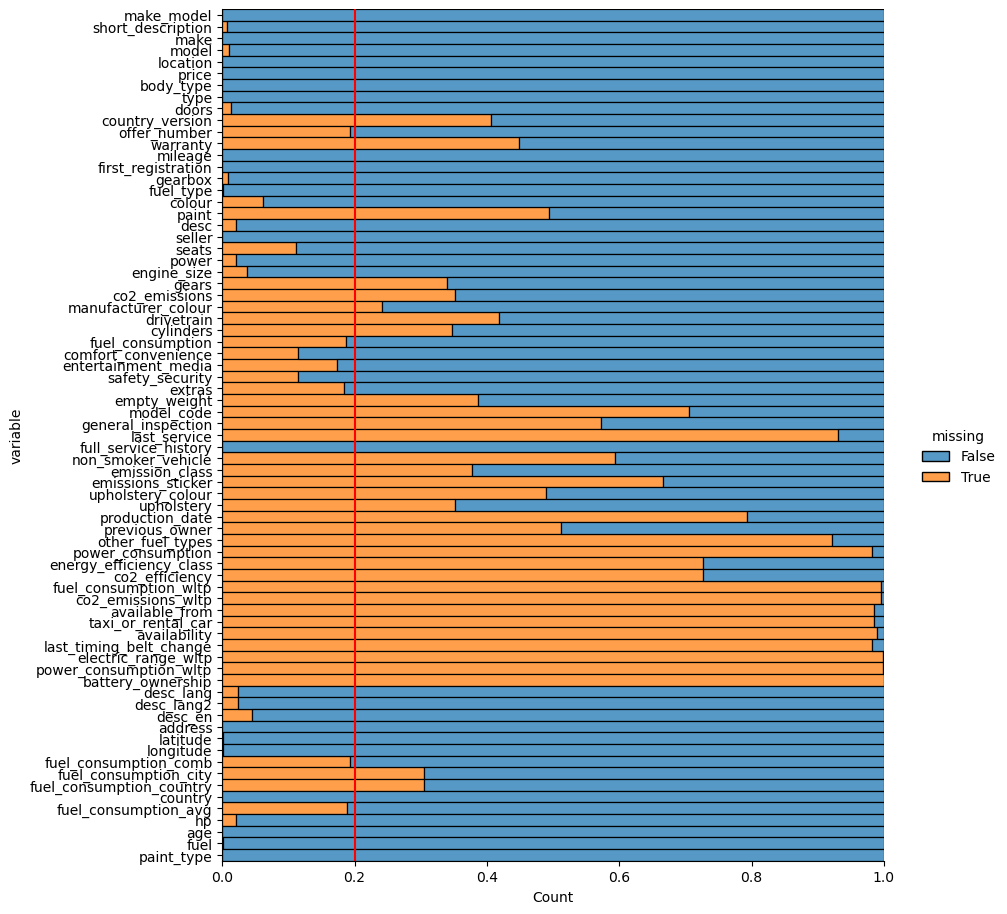

In [314]:
show_nulls(df)

In [315]:
df0 = df.copy()

In [334]:
df= df0.copy()

In [335]:
# DROP COLUMNS IF IT HAS MORE THAN 20 percent nans
# calculate the percentage of NaN values in each column
def drop_columns_nan(dataframe, percentage = 50):
    nan_percent = dataframe.isna().sum() / len(dataframe) * 100

    # get the column names with more than percentage% NaN values
    cols_to_drop = nan_percent[nan_percent > percentage].index.tolist()

    # drop the columns with more than percentage% NaN values
    return dataframe.drop(cols_to_drop, axis=1)

# DROP
df = drop_columns_nan(df,20)
df = df.drop(['offer_number','desc_lang','desc_lang2','desc_en','fuel_consumption','fuel_consumption_comb','location','address','latitude','longitude','short_description','desc','first_registration','fuel_type'], axis=1)
# df = df.drop(['fuel_consumption_city','fuel_consumption_country'], axis=1)
df = df.drop(['power'], axis=1)

In [336]:
# df.to_csv('after_drop.csv',index=False)

<Figure size 1000x500 with 0 Axes>

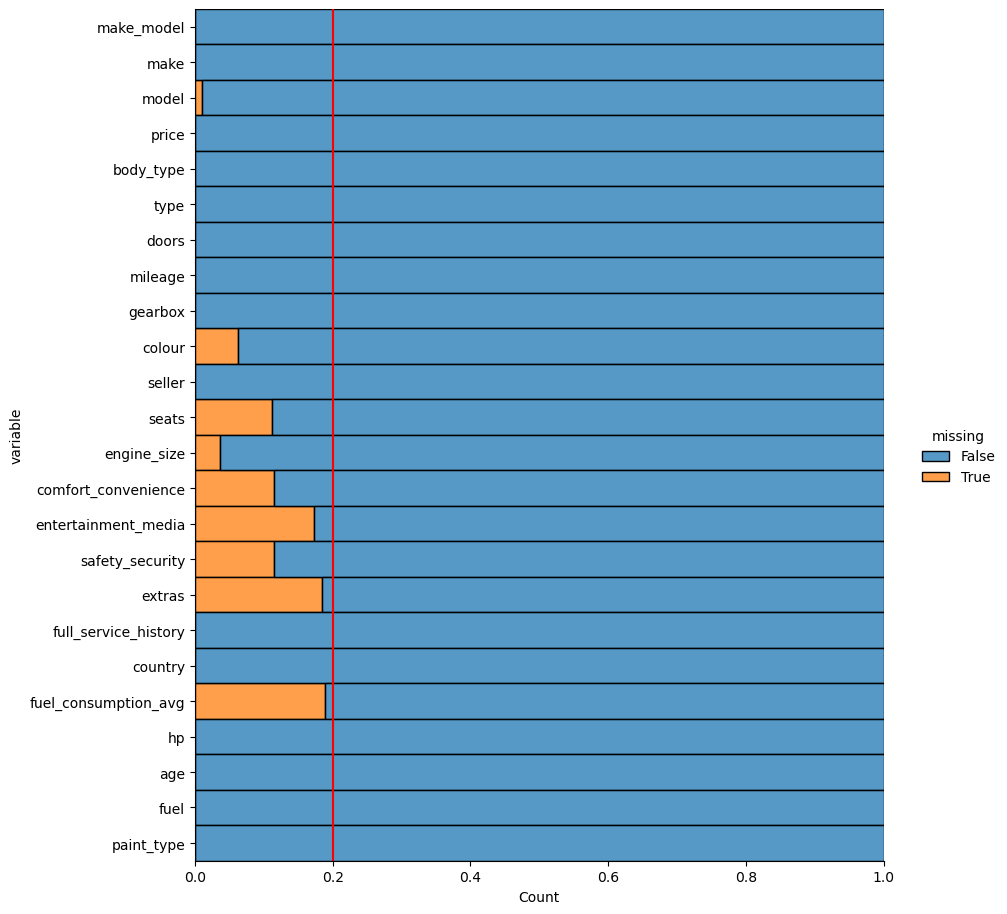

In [371]:
show_nulls(df)

In [347]:
df.sample(3)

,make_model,make,model,price,body_type,type,doors,mileage,gearbox,colour,seller,seats,engine_size,comfort_convenience,entertainment_media,safety_security,extras,full_service_history,country,fuel_consumption_avg,hp,age,fuel,paint_type
17754,Toyota Yaris Cross,Toyota,Yaris Cross,23700,Off-Road/Pick-up,Pre-registered,5.0,3.0,Automatic,Grey,Dealer,5.0,1490.0,NaN,NaN,NaN,NaN,No,Spain,0.0,116.0,0.0,Electric,Non-Metallic
18919,Nissan Pulsar,Nissan,Pulsar,12617,Compact,Used,5.0,112709.0,Manual,Black,Dealer,5.0,1461.0,"Air conditioning, Automatic climate control, C...","Bluetooth, CD player","ABS, Central door lock, Fog lights, Immobilize...",Alloy wheels,No,Spain,3.6,110.0,7.0,Diesel,Non-Metallic
2617,Opel Corsa,Opel,Corsa,27900,Compact,Used,4.0,1140.0,Automatic,White,Dealer,5.0,NaN,"Air conditioning, Automatic climate control, A...","Android Auto, Apple CarPlay, Bluetooth, Digita...","ABS, Blind spot monitor, Central door lock, Da...","Alloy wheels, Automatically dimming interior m...",No,Germany,NaN,136.0,0.0,Electric,Non-Metallic


In [339]:
df['hp'] = df.groupby(['make_model', 'body_type','age','fuel'])['hp'].transform(lambda x: x.fillna(x.mean()))

In [341]:
df['hp'] = df.groupby(['make_model', 'body_type','fuel'])['hp'].transform(lambda x: x.fillna(x.mean()))

In [343]:
df['hp'] = df.groupby(['make_model', 'body_type'])['hp'].transform(lambda x: x.fillna(x.mean()))

In [345]:
df['hp'] = df.groupby(['make_model'])['hp'].transform(lambda x: x.fillna(x.mean()))

In [385]:
def fillwith(col):
    print(df[col].isna().value_counts())
    df[col] = df.groupby(['make_model', 'body_type','age','hp'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make_model', 'body_type','age','fuel'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make_model', 'body_type','fuel'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make_model', 'body_type'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make_model'])[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df.groupby(['make'])[col].transform(lambda x: x.fillna(x.mean()))
    print('after')
    print(df[col].isna().value_counts())

In [369]:
def fillwithMode(col):
    print(df[col].isna().value_counts())
    df[col] = df.groupby(['make_model', 'body_type','age','fuel'])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
    df[col] = df.groupby(['make_model', 'body_type','fuel'])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
    df[col] = df.groupby(['make_model', 'body_type'])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
    df[col] = df.groupby(['make_model'])[col].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else np.nan)
    print('after')
    print(df[col].isna().value_counts())

In [356]:
fillwith('hp')

False    26317
True       565
Name: hp, dtype: int64
False    26875
True         7
Name: hp, dtype: int64


In [357]:
fillwith('doors')

False    26541
True       341
Name: doors, dtype: int64
False    26868
True        14
Name: doors, dtype: int64


In [358]:
df2 = df.copy()

In [370]:
fillwithMode('gearbox')

False    26648
True       234
Name: gearbox, dtype: int64
after
False    26882
Name: gearbox, dtype: int64


In [372]:
fillwithMode('colour')

False    25208
True      1674
Name: colour, dtype: int64
after
False    26867
True        15
Name: colour, dtype: int64


In [373]:
fillwithMode('seats')

False    23881
True      3001
Name: seats, dtype: int64
after
False    26843
True        39
Name: seats, dtype: int64


In [374]:
fillwith('engine_size')

False    25891
True       991
Name: engine_size, dtype: int64
False    26820
True        62
Name: engine_size, dtype: int64


In [376]:
df.engine_size.isna().value_counts()

False    26820
True        62
Name: engine_size, dtype: int64

In [377]:
fillwith('fuel_consumption_avg')

False    21798
True      5084
Name: fuel_consumption_avg, dtype: int64
False    26250
True       632
Name: fuel_consumption_avg, dtype: int64


In [378]:
fillwithMode('comfort_convenience')

False    23791
True      3091
Name: comfort_convenience, dtype: int64
after
False    26800
True        82
Name: comfort_convenience, dtype: int64


In [380]:
fillwithMode('safety_security')

False    23786
True      3096
Name: safety_security, dtype: int64
after
False    26760
True       122
Name: safety_security, dtype: int64


In [381]:
fillwithMode('extras')

False    21921
True      4961
Name: extras, dtype: int64
after
False    26784
True        98
Name: extras, dtype: int64


In [383]:
fillwithMode('entertainment_media')

False    22228
True      4654
Name: entertainment_media, dtype: int64
after
False    26750
True       132
Name: entertainment_media, dtype: int64


<Figure size 1000x500 with 0 Axes>

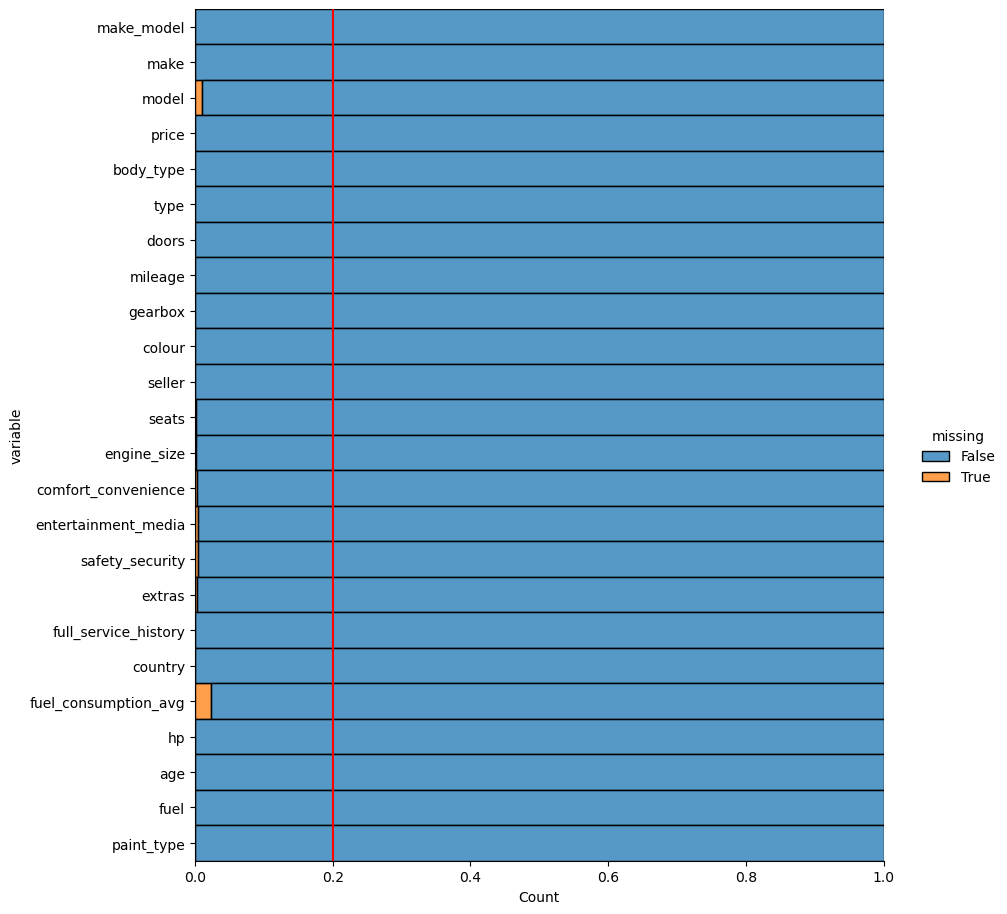

In [384]:
show_nulls(df)

In [386]:
fillwith('fuel_consumption_avg')

False    26250
True       632
Name: fuel_consumption_avg, dtype: int64
after
False    26882
Name: fuel_consumption_avg, dtype: int64


In [387]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [390]:
df.isna().value_counts()

make_model  make   model  price  body_type  type   doors  mileage  gearbox  colour  seller  seats  engine_size  comfort_convenience  entertainment_media  safety_security  extras  full_service_history  country  fuel_consumption_avg  hp     age    fuel   paint_type
False       False  False  False  False      False  False  False    False    False   False   False  False        False                False                False            False   False                 False    False                 False  False  False  False         26882
dtype: int64

# PART- 3 `( Handling With Outliers )`

# Final Step (Checking final situation of data via graphs)

<AxesSubplot:>

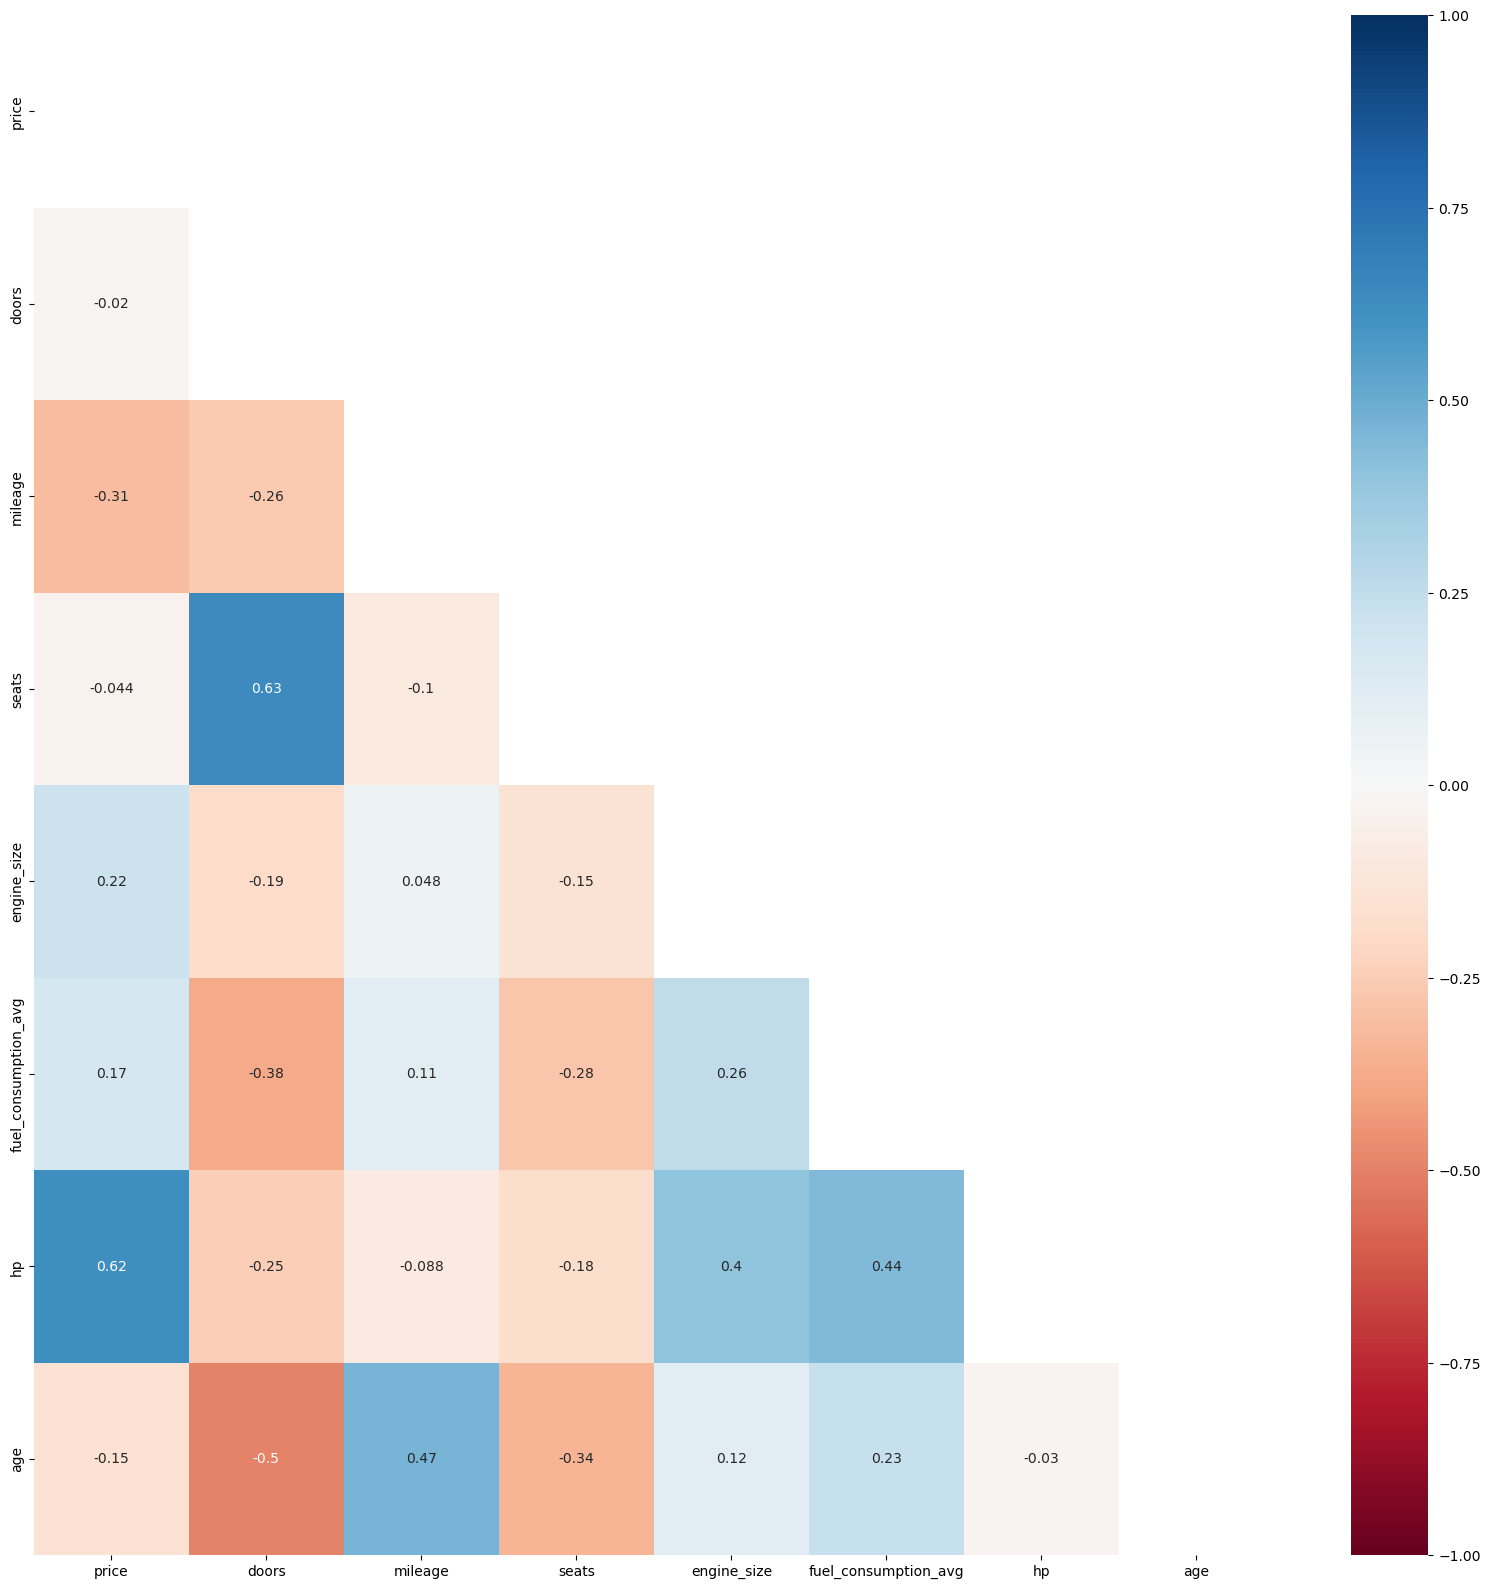

In [424]:
plt.figure(figsize=(20,20))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1,cmap='RdBu')

## Export dataframe to csv file (without dummy)

In [391]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

In [399]:
dummies_em = df['entertainment_media'].str.get_dummies(sep=', ').add_prefix('em_')


In [400]:
dummies_ss = df['safety_security'].str.get_dummies(sep=', ').add_prefix('ss_')


In [401]:
dummies_cc = df.comfort_convenience.str.get_dummies(sep=', ').add_prefix('cc_')


In [412]:
dummies_ex = df.extras.str.get_dummies(sep=', ').add_prefix('ex_')


In [431]:
df_dummied = pd.get_dummies(df.drop(['make','model','entertainment_media','safety_security','comfort_convenience','extras'], axis=1), drop_first = True)

In [433]:
df_dummied = pd.concat([df_dummied, dummies_em,dummies_ss,dummies_cc,dummies_ex], axis=1)

In [437]:
new_column_names1 = {col: col.lower().replace('\n', '').strip().replace('\\', '').replace('\"', '').replace('&', '').replace('co₂', 'co2').replace('-', '_').replace(' ', '_').replace('__', '_').replace('(', '').replace(')', '') for col in df_dummied.columns}
new_column_names1

{'price': 'price',
 'doors': 'doors',
 'mileage': 'mileage',
 'seats': 'seats',
 'engine_size': 'engine_size',
 'fuel_consumption_avg': 'fuel_consumption_avg',
 'hp': 'hp',
 'age': 'age',
 'make_model_Dacia Break': 'make_model_dacia_break',
 'make_model_Dacia Dokker': 'make_model_dacia_dokker',
 'make_model_Dacia Duster': 'make_model_dacia_duster',
 'make_model_Dacia Jogger': 'make_model_dacia_jogger',
 'make_model_Dacia Lodgy': 'make_model_dacia_lodgy',
 'make_model_Dacia Logan': 'make_model_dacia_logan',
 'make_model_Dacia Sandero': 'make_model_dacia_sandero',
 'make_model_Dacia Spring': 'make_model_dacia_spring',
 'make_model_Fiat ': 'make_model_fiat',
 'make_model_Fiat 124 Coupè': 'make_model_fiat_124_coupè',
 'make_model_Fiat 124 Spider': 'make_model_fiat_124_spider',
 'make_model_Fiat 126': 'make_model_fiat_126',
 'make_model_Fiat 127': 'make_model_fiat_127',
 'make_model_Fiat 128': 'make_model_fiat_128',
 'make_model_Fiat 130': 'make_model_fiat_130',
 'make_model_Fiat 131': 'mak

In [439]:
df_dummied = df_dummied.rename(columns=new_column_names1)
df_dummied.columns

Index(['price', 'doors', 'mileage', 'seats', 'engine_size',
       'fuel_consumption_avg', 'hp', 'age', 'make_model_dacia_break',
       'make_model_dacia_dokker',
       ...
       'ex_sport_seats', 'ex_sport_suspension', 'ex_steel_wheels',
       'ex_summer_tyres', 'ex_touch_screen', 'ex_trailer_hitch',
       'ex_tuned_car', 'ex_voice_control', 'ex_winter_package',
       'ex_winter_tyres'],
      dtype='object', length=809)

## Export dataframe to csv file (dummy)

In [440]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)